# Medical Cost Prediction

In [3]:
import pandas as pd
medical_df = pd.read_csv("D:/micro project/insurance.csv")

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#number of rows and columns
medical_df.shape

(1338, 7)

In [6]:
#getting some information of data set
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# HANDLING NOISY DATA

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
ages=medical_df['age']
bins=[10,20,30,40,50,60,70]
labels=['10-20','20-30','30-40','40-50','50-60','60-70']

In [10]:
data=pd.DataFrame({'Age':ages})

In [11]:
data['Age Group']=pd.cut(data['Age'],bins=bins,labels=labels,right=False)

In [12]:
print(data)

      Age Age Group
0      19     10-20
1      18     10-20
2      28     20-30
3      33     30-40
4      32     30-40
...   ...       ...
1333   50     50-60
1334   18     10-20
1335   18     10-20
1336   21     20-30
1337   61     60-70

[1338 rows x 2 columns]


In [13]:
bin_counts=data['Age Group'].value_counts().sort_index()

In [14]:
print(bin_counts)

Age Group
10-20    137
20-30    280
30-40    257
40-50    279
50-60    271
60-70    114
Name: count, dtype: int64


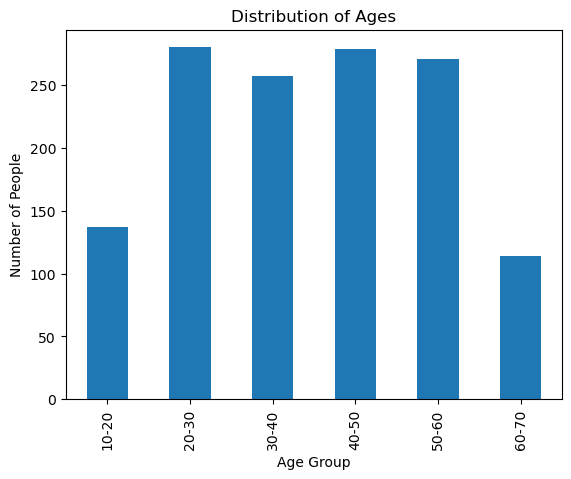

In [15]:
bin_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Distribution of Ages')
plt.show()

# Identifying outliers [age]

In [16]:
data=medical_df['age']

In [17]:
Q1=np.percentile(data,25)
Q3=np.percentile(data,75)

In [18]:
IQR=Q3-Q1

In [19]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [20]:
outliers=[x for x in data if x<lower_bound or x> upper_bound]

In [21]:
print(f"Q1:{Q1}")
print(f"Q3:{Q3}")
print(f"IQR:{IQR}")
print(f"Lower bound:{lower_bound}")
print(f"Upper bound:{upper_bound}")
print(f"Outliers:{outliers}")

Q1:27.0
Q3:51.0
IQR:24.0
Lower bound:-9.0
Upper bound:87.0
Outliers:[]


# Identifying outliers [charges]

In [22]:
data=medical_df['charges']

In [23]:
Q1=np.percentile(data,25)
Q3=np.percentile(data,75)

In [24]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [25]:
outliers=[x for x in data if x<lower_bound or x> upper_bound]

In [26]:
print(f"Q1:{Q1}")
print(f"Q3:{Q3}")
print(f"IQR:{IQR}")
print(f"Lower bound:{lower_bound}")
print(f"Upper bound:{upper_bound}")
print(f"Outliers:{outliers}")

Q1:4740.28715
Q3:16639.912515
IQR:24.0
Lower bound:4704.28715
Upper bound:16675.912515
Outliers:[16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 28923.13692, 2721.3208, 27808.7251, 1826.843, 39611.7577, 1837.237, 2395.17155, 36837.467, 4149.736, 1137.011, 37701.8768, 2775.19215, 38711.0, 35585.576, 2198.18985, 4687.797, 51194.55914, 1625.43375, 2302.3, 39774.2763, 48173.361, 3046.062, 20630.28351, 3393.35635, 3556.9223, 38709.176, 2211.13075, 3579.8287, 23568.272, 37742.5757, 47496.49445, 34303.1672, 23244.7902, 4504.6624, 30166.61817, 4133.64165, 1743.214, 17663.1442, 3947.4131, 1532.4697, 2755.02095, 4441.21315, 37165.1638, 39836.519, 21098.55405, 43578.9394, 2026.9741, 30184.9367, 47291.055, 3766.8838, 22412.6485, 3645.0894, 21344.8467, 30942.1918, 17560.37975, 2331.519, 3877.30425, 2867.1196, 47055.5321, 4646.759, 2404.7338, 30259.99556, 19107.7796, 1705.6245, 2257.47525, 39556.4945, 3385.39915, 17081.08, 32734.1863, 1632.56445, 2457.21115, 2155.6815, 1261.442, 2

# Normality of data

In [27]:
data=medical_df['charges']

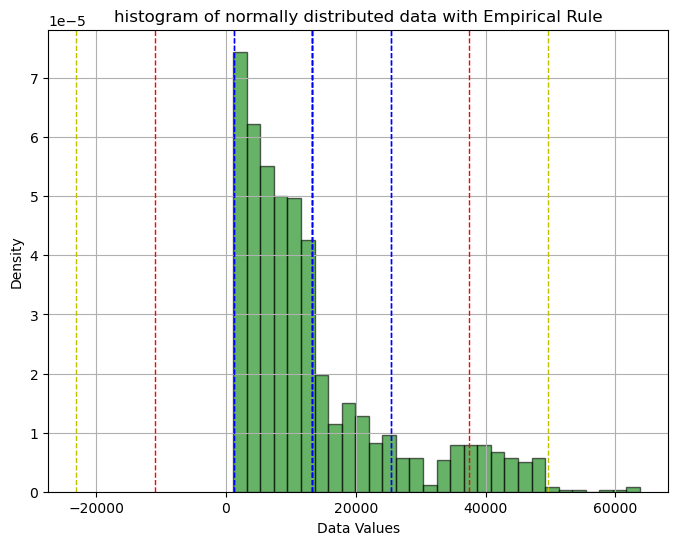

In [28]:
plt.figure(figsize=(8,6))
plt.hist(data,bins=30,density=True,alpha=0.6,color='g',edgecolor='black')
mean=np.mean(data)
std_dev=np.std(data)
plt.axvline(mean,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean+std_dev,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean-std_dev,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean+2*std_dev,color='r',linestyle='dashed',linewidth=1)
plt.axvline(mean-2*std_dev,color='r',linestyle='dashed',linewidth=1)
plt.axvline(mean,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean+std_dev,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean-std_dev,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean,color='b',linestyle='dashed',linewidth=1)
plt.axvline(mean+3*std_dev,color='y',linestyle='dashed',linewidth=1)
plt.axvline(mean-3*std_dev,color='y',linestyle='dashed',linewidth=1)
plt.title('histogram of normally distributed data with Empirical Rule')
plt.xlabel("Data Values")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# Std dev method

In [29]:
def calculate_mean(data):
    return np.mean(data)
def calculate_std_dev(data):
    return np.std(data,ddof=0)
def find_outliers(data,threshold=2):
    mean=calculate_mean(data)
    std_dev=calculate_std_dev(data)
    lower_bound=mean-threshold*std_dev
    upper_bound=mean+threshold*std_dev
    outliers=[x for x in data if x < lower_bound or x > upper_bound]
    return outliers,mean,std_dev,lower_bound,upper_bound

In [30]:
outliers,mean,std_dev,lower_bound,upper_bound=find_outliers(data)

In [31]:
print(f"Mean :{mean}")
print(f"standard deviation:{std_dev}")
print(f"lower bound :{lower_bound}")
print(f"Upper bound :{upper_bound}")
print(f"Outliers :{outliers}")

Mean :13270.422265141257
standard deviation:12105.484975561605
lower bound :-10940.547685981954
Upper bound :37481.39221626447
Outliers :[39611.7577, 37701.8768, 38711.0, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 48824.45, 43753.33705, 38511.6283, 47305.305, 44260.7499, 41097.16175, 43921.1837, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 42760.5022, 47928.03, 48517.56315, 41919.097, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 48885.13561, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 44585.45587, 43254.41795, 38792.6856, 55135.40209, 43813.8661, 39597.4072, 45008.9555, 42111.6647, 40974.1649, 46113.511, 46255.112

# Percentile method

In [32]:
lower_percentile=np.percentile(data,5)
upper_percentile=np.percentile(data,95)
outliers=data[(data<lower_percentile)|(data>upper_percentile)]

In [33]:
print(f"5th percentile : {lower_percentile}")
print(f"95th percentile : {upper_percentile}")
print(f"Outliers:{outliers}")

5th percentile : 1757.7534
95th percentile : 41181.827787499926
Outliers:1        1725.55230
22       1137.01100
34      51194.55914
35       1625.43375
39      48173.36100
           ...     
1301    46718.16325
1316     1731.67700
1317     1163.46270
1323    43896.37630
1335     1629.83350
Name: charges, Length: 134, dtype: float64


# Visualizing outliers

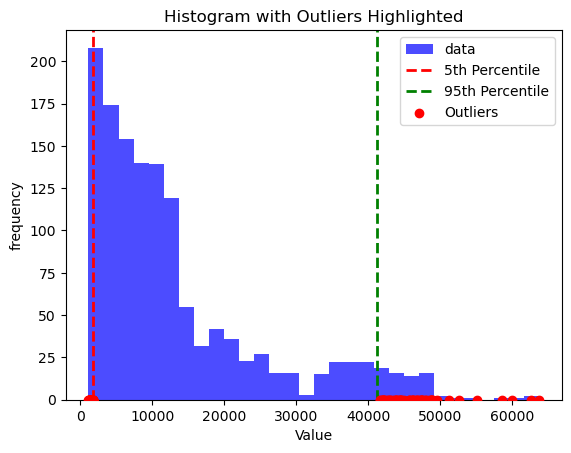

In [34]:
plt.hist(data,bins=30,color='blue',alpha=0.7,label='data')
plt.axvline(lower_percentile,color='red',linestyle='dashed',linewidth=2,label='5th Percentile')
plt.axvline(upper_percentile,color='green',linestyle='dashed',linewidth=2,label='95th Percentile')
plt.scatter(outliers,np.zeros_like(outliers),color='red',zorder=5,label='Outliers')
plt.xlabel('Value')
plt.ylabel('frequency')
plt.title('Histogram with Outliers Highlighted')
plt.legend()
plt.show()

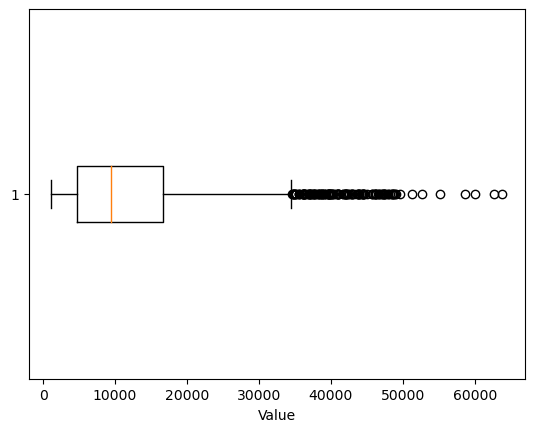

In [35]:
plt.boxplot(data,vert=False)
plt.xlabel('Value')
plt.show()

# Handling outliers

In [36]:
df= medical_df

#Calculate the 1st and 3rd quartile
Q1=df['charges'].quantile(0.25) 
Q3=df['charges'].quantile(0.75)

#Calculate the IQR
IQR=Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Filter out the outliers
df_filtered=df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

print(df_filtered)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1199 rows x 7 columns]


# Cap and Floor Outliers

In [37]:
df['charges'] = np.where(df['charges'] > upper_bound, upper_bound, df['charges'])

df['charges'] = np.where(df['charges'] < lower_bound, lower_bound, df['charges'])

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


# EDA

In [38]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import statistics as st

In [39]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,12479.369251
std,14.049960,6.098187,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,34489.350562


In [42]:
data=medical_df['charges']
mean=np.mean(data)
print(mean)

12479.369250625186


In [43]:
data=medical_df['charges']
median=np.median(data)
print(median)

9382.033


In [44]:
data=medical_df['charges']
mode=st.mode(data)
print(mode)

34489.350562499996


# variance

In [45]:
variance=np.var(data)
print(f"Variance:{variance}")

Variance:103108983.98129052


# std dev

In [46]:
mean_score=np.mean(data)
squared_diff=(data-mean_score)**2
variance=np.mean(squared_diff)
std_dev=np.sqrt(variance)
print(f"Mean score :{mean_score}")
print(f"Standard deviation :{std_dev}")

Mean score :12479.369250625186
Standard deviation :10154.259400925832


In [47]:
std_dev=st.stdev(data)
print(f"Standard deviation :{std_dev}")

Standard deviation :10158.0560955438


In [48]:
mean=np.mean(data)
range_=np.ptp(data)
q1 = np.percentile(data, 25) 
q3 = np.percentile (data, 75) 
iqr=q3-q1
variance = np.var(data)
std_dev = np.std(data)
mad=np.mean(np.abs(data-mean))
cv = (std_dev / mean) * 100

print(f"Range: {range_}")
print(f"IQR: {iqr}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"MAD: {mad}")
print(f"CV: {cv}%")

Range: 33367.4766625
IQR: 11899.625365
Variance: 103108983.98129052
Standard Deviation: 10154.259400925826
MAD: 8032.076715270795
CV: 81.36837044402002%


In [49]:
categorical_columns = [col for col in medical_df.columns if medical_df[col].dtype == 'object']
numerical_columns = [col for col in medical_df.columns if medical_df[col].dtype in ['int', 'float']]

In [50]:
medical_df[categorical_columns].nunique()

sex       2
smoker    2
region    4
dtype: int64

# Bar Graph

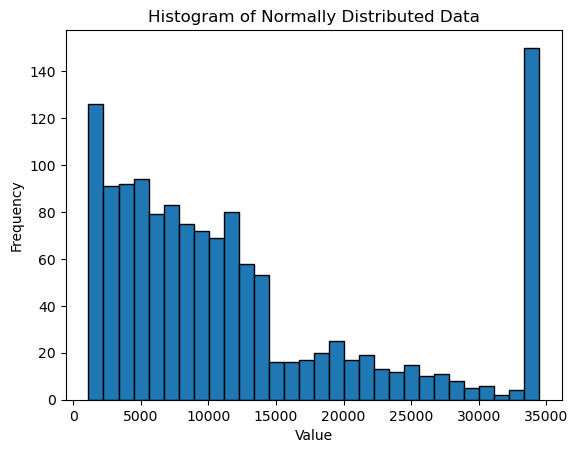

In [51]:
import matplotlib.pyplot as plt 
import numpy as np

plt.hist(data, bins=30, edgecolor='black')
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Data Visualization

In [52]:
#checking for missing values
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

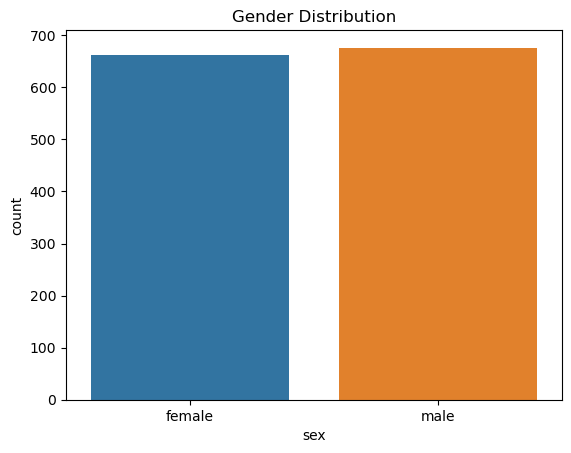

In [53]:
import matplotlib.pyplot as plt
sns.countplot(x='sex',data=medical_df)
plt.title('Gender Distribution')
plt.show()

In [54]:
medical_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

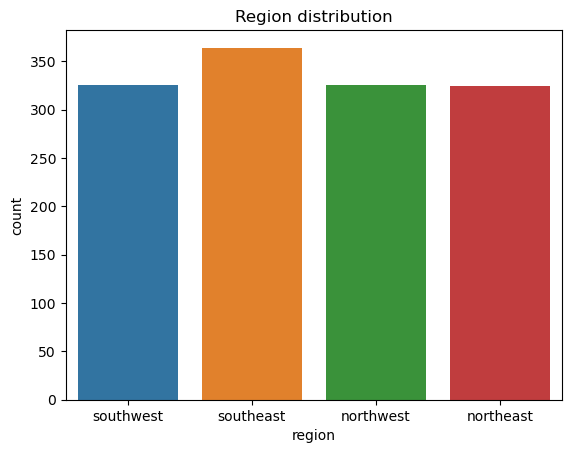

In [55]:
sns.countplot(x='region',data=medical_df)
plt.title('Region distribution')
plt.show()

In [56]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

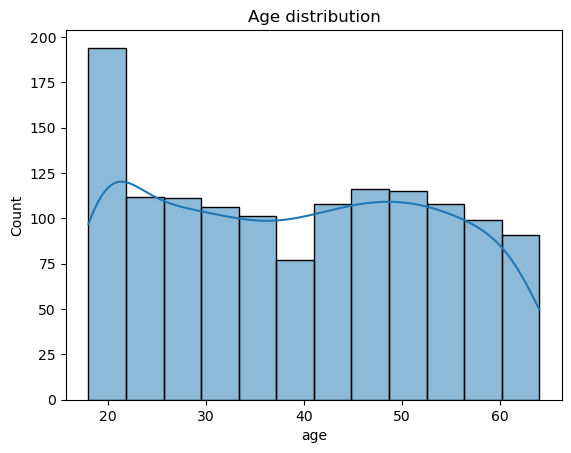

In [57]:
sns.histplot(medical_df['age'],kde=True)
plt.title('Age distribution')
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_1556\2767448602.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_df['age'])


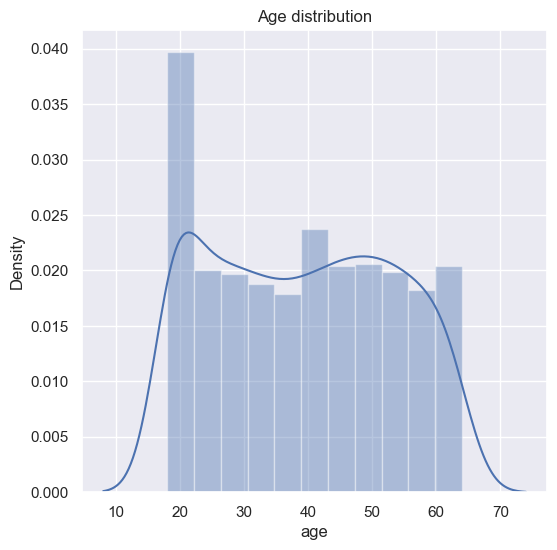

In [58]:
#Distribution of Age Value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical_df['age'])
plt.title('Age distribution')
plt.show()

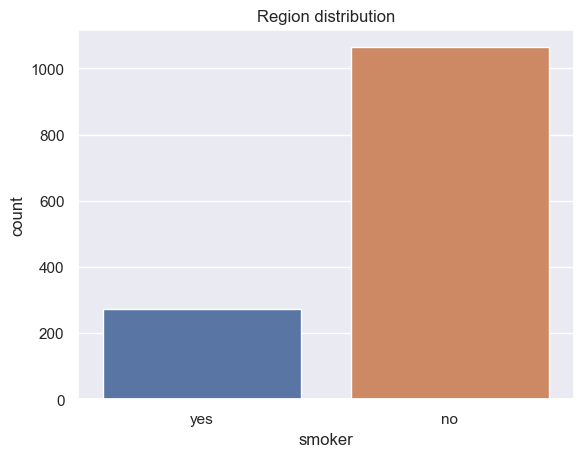

In [59]:
sns.countplot(x='smoker',data=medical_df)
plt.title('Region distribution')
plt.show()

In [60]:
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

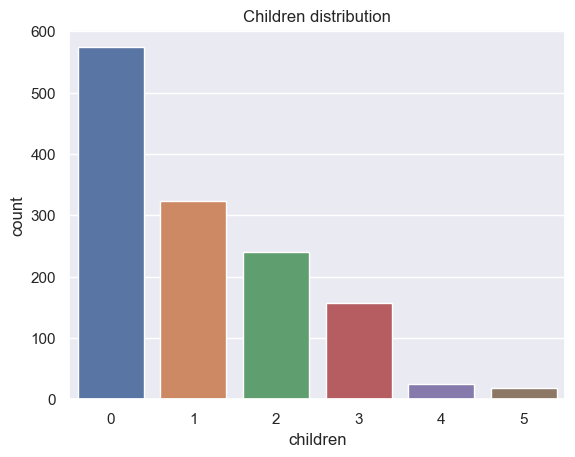

In [61]:
sns.countplot(x='children',data=medical_df)
plt.title('Children distribution')
plt.show()

In [62]:
medical_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

C:\Users\MSI\AppData\Local\Temp\ipykernel_1556\2024246884.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_df['bmi'])


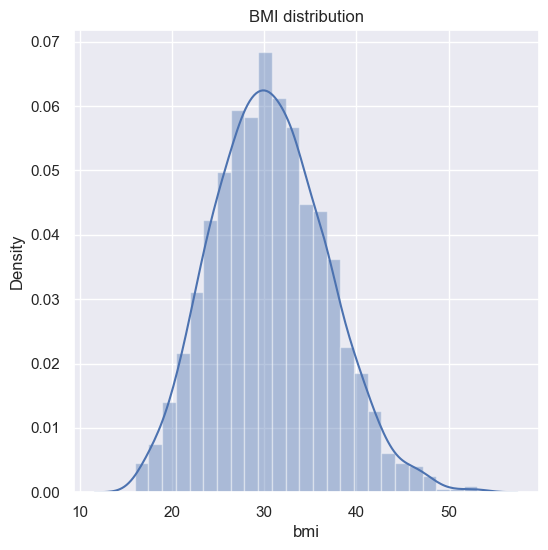

In [63]:
#bmi Distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical_df['bmi'])
plt.title('BMI distribution')
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_1556\327392654.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_df['charges'],kde=True)


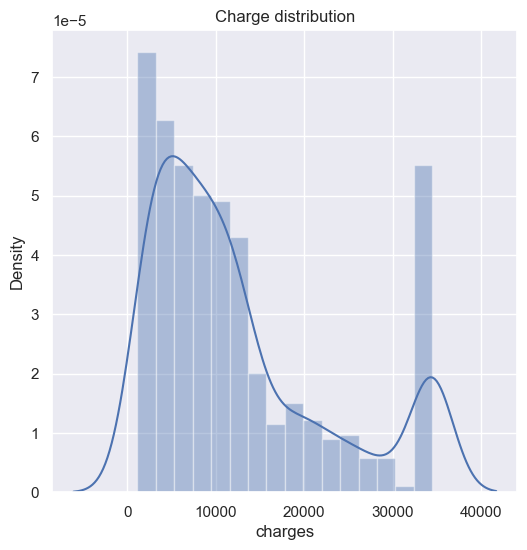

In [64]:
#Distribution of Charges
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(medical_df['charges'],kde=True)
plt.title('Charge distribution')
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

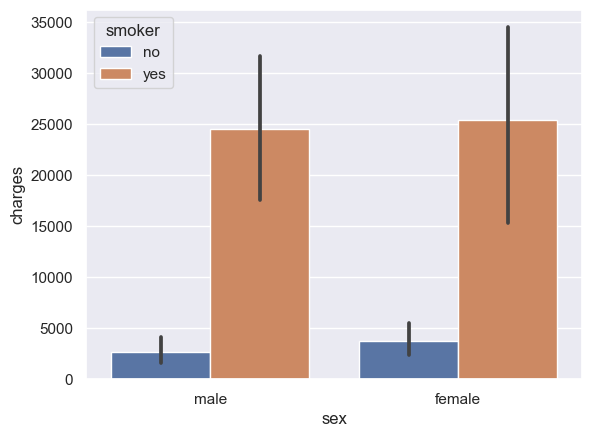

In [65]:
sns.barplot(x='sex',y='charges',hue='smoker',data=medical_df[(medical_df.age==18)])

<Axes: xlabel='region', ylabel='charges'>

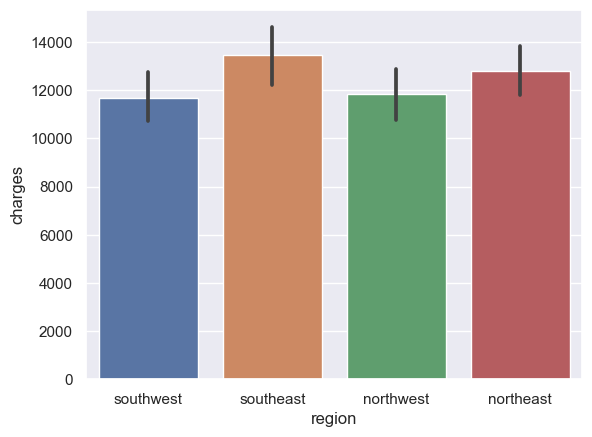

In [66]:
sns.barplot(x='region',y='charges',data=medical_df)

# Encoding the categorical features

In [67]:
#encoding sex column 
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [68]:
#encoding smoker column 
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [69]:
#encoding region column 
medical_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

# Categorical Values BoxPlot

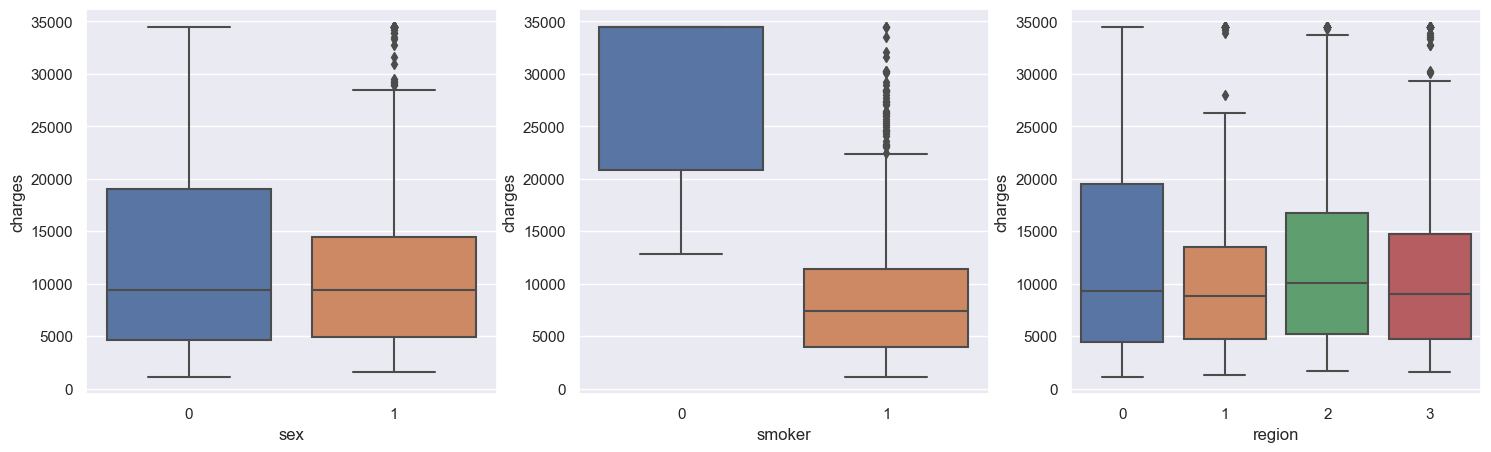

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(ax=axes[0], x='sex', y='charges', data = medical_df)
sns.boxplot(ax=axes[1], x='smoker', y='charges', data = medical_df)
sns.boxplot(ax=axes[2], x='region', y='charges', data = medical_df)
plt.show()

# Age vs Charges ScatterPlot

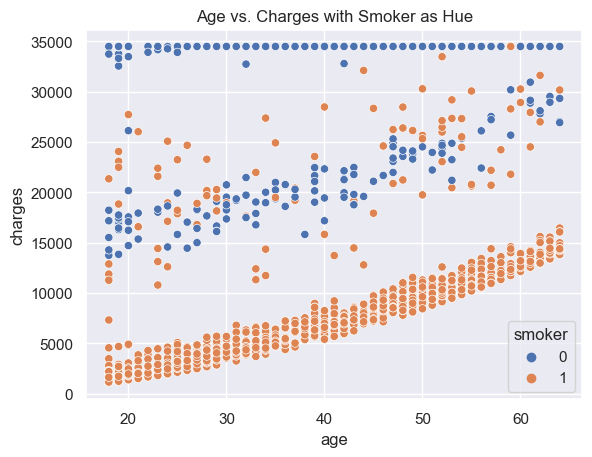

In [71]:
sns.scatterplot(x='age', y='charges', hue='smoker', data = medical_df)
plt.title("Age vs. Charges with Smoker as Hue")
plt.show()

# Charge vs BMI Implot

C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Charge Vs BMI')

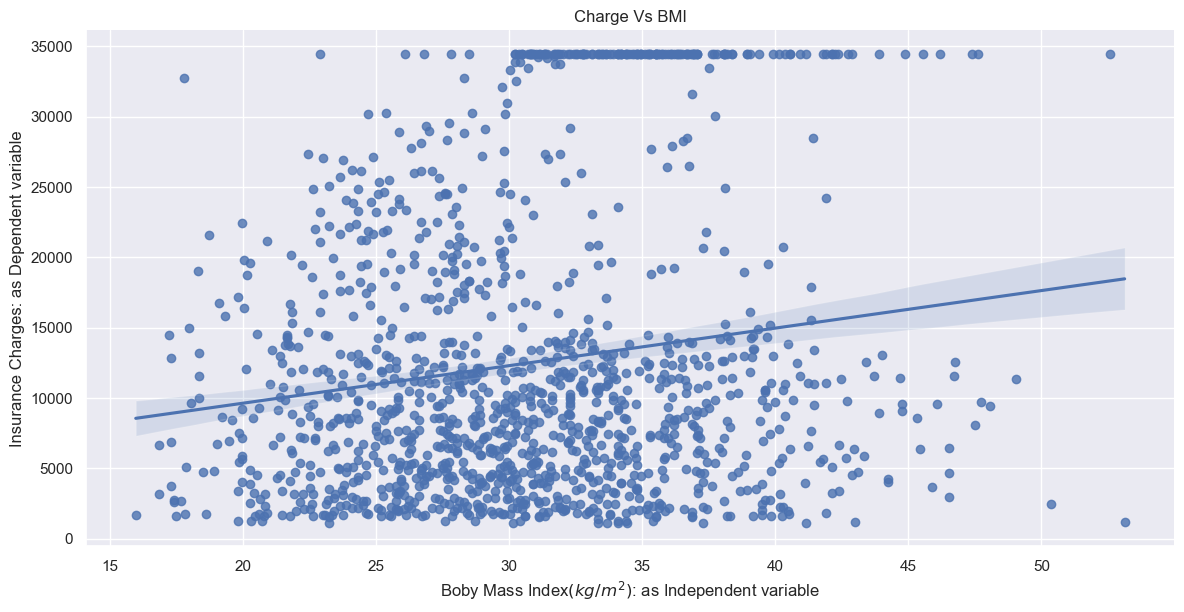

In [72]:
sns.lmplot(x='bmi',y='charges',data = medical_df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')

# Heatmap

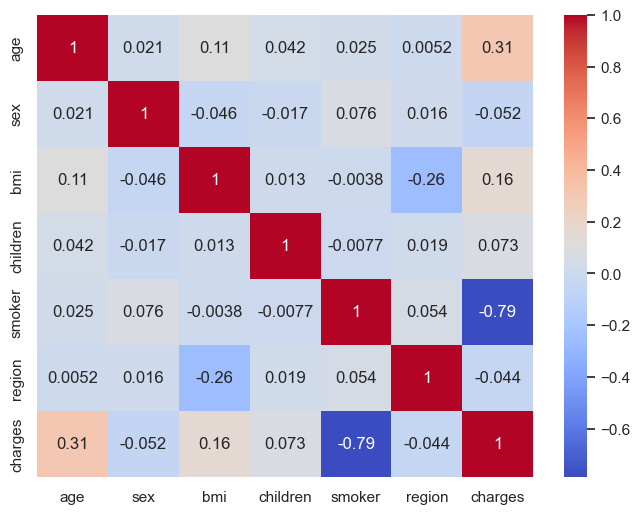

In [73]:
corr_matrix = medical_df.select_dtypes(include=[float, int]).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Modelling

# Splitting Data

In [74]:
X = medical_df.drop(columns = ['charges'])
y = medical_df['charges']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Linear Regression Mode

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [77]:
from sklearn.metrics import r2_score, mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_predict)}")

r2 = r2_score(y_test,y_predict)
print(f"{r2}%")

MAE: 3317.1698847112616
0.7836344448574291%


# Residuals vs Predicted Scatter Plot

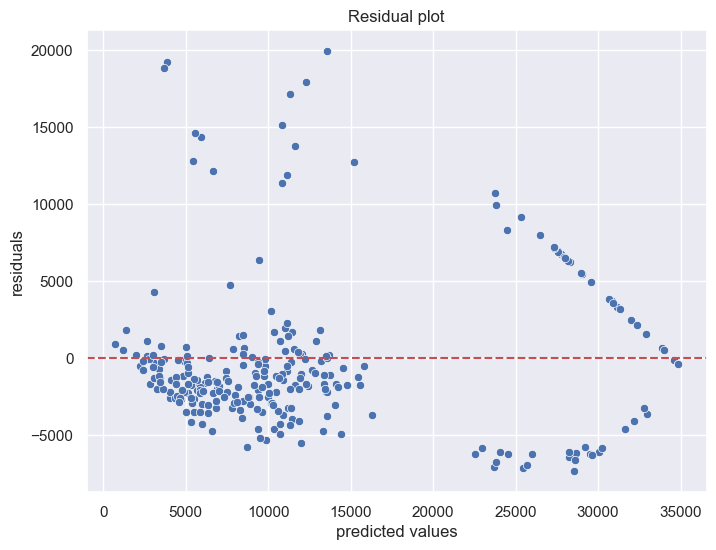

In [78]:
plt.figure(figsize=(8,6))
residuals=y_test-y_predict
sns.scatterplot(x=y_predict,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual plot')
plt.xlabel('predicted values') 
plt.ylabel('residuals')
plt.show()

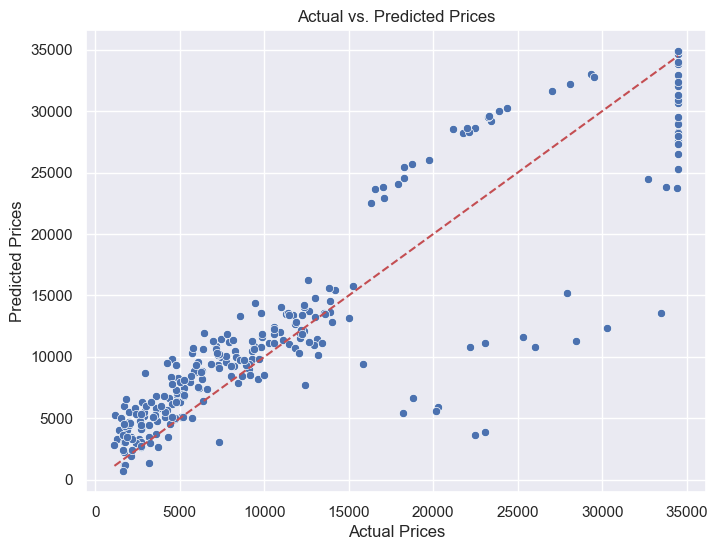

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_predict)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='r',linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [80]:
import joblib
joblib.dump(model,'insurance_cost_model.pkl')

['insurance_cost_model.pkl']

In [81]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
